In [2]:
# This is Eli's Python File
# Import statements
import numpy as np
import pandas as pd
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

In [11]:
# Read the affordability data
median_income_csv = Path("../Data/household_income_msa_2019.csv")
median_income_df = pd.read_csv(median_income_csv)
# Clean the affordability data
median_income_df = median_income_df.transpose() # Transpose the column/headers
new_header = median_income_df.iloc[0] #grab the first row for the header
median_income_df = median_income_df[1:] #take the data less the header row
median_income_df.columns = new_header #set the header row as the df header
median_income_df = median_income_df[['Median income (dollars)','Mean income (dollars)']] # Use only median and mean income data columns
median_income_df.reset_index(inplace=True)
median_income_df[['MSA','extra']] = median_income_df['index'].str.split(",", n = 1, expand=True) # Split MSA from text string
median_income_df[['State','extra2']] = median_income_df['extra'].str.split(n = 1, expand=True) # Split State from remaining text string
median_income_df[['Primary MSA','Secondary MSA']] = median_income_df['MSA'].str.split("-", n = 1, expand=True) # Split primary MSA from first text string
median_income_df[['Primary State','Secondary State']] = median_income_df['State'].str.split("-", n = 1, expand=True) # Split primary State from first text string
median_income_df.drop(columns=['index','extra','extra2','MSA','State'],inplace=True) # Drop unnecessary columns
median_income_df.drop_duplicates(subset=['Primary MSA','Primary State'], inplace=True) # Drop duplicates -- first instance is the median and mean income by MSA
median_income_df.head()

Label,Median income (dollars),Mean income (dollars),Primary MSA,Secondary MSA,Primary State,Secondary State
0,"61,026","77,948",Aberdeen,None,WA,None
8,"54,808","71,517",Abilene,None,TX,None
16,"53,865","69,443",Adrian,None,MI,None
24,"16,311","25,781",Aguadilla,Isabela,PR,None
32,"57,158","80,800",Akron,None,OH,None


In [46]:
# read the uscities csv. this file will be used for the longitude and latitude, as well as the density stats.
longlatdensity_csv = Path("../Data/uscities.csv")
longlatdensity_df = pd.read_csv(longlatdensity_csv)
longlatdensity_df.head(5)

#getting first zipcode from list of zipcodes
longlatdensity_df[['firstzip']] = longlatdensity_df['zips'].str.split(",", n = 1, expand=True)
longlatdensity_df[['firstzip']] = longlatdensity_df['zips'].str[:5]

#dropping unnecessary columns
longlatdensity_df.drop(columns=['source','military','incorporated','timezone','city_ascii',"zips"],inplace=True)
longlatdensity_df.drop_duplicates()
longlatdensity_df

,city,state_id,state_name,county_fips,county_name,lat,lng,population,density,ranking,id,firstzip
0,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,1,1840034016,11229
1,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,1,1840020491,90291
2,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203.0,4574.0,1,1840000494,60018
3,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545.0,5019.0,1,1840015149,33129
4,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938.0,1526.0,1,1840019440,75287
...,...,...,...,...,...,...,...,...,...,...,...,...
29483,Caputa,SD,South Dakota,46103,Pennington,43.9960,-102.9847,0.0,0.0,3,1840035951,57703
29484,Hamill,SD,South Dakota,46123,Tripp,43.5939,-99.6907,0.0,0.0,3,1840004186,57534
29485,Loomis,SD,South Dakota,46035,Davison,43.7931,-98.1036,0.0,0.0,3,1840004170,57301
29486,Bijou Hills,SD,South Dakota,46015,Brule,43.5285,-99.1439,0.0,0.0,3,1840024011,57369


In [88]:
# # Testing Monte Carlo Simulation
# # Read in test CSV
# test_csv = Path("../Data/sim_test_data.csv")
# test_df = pd.read_csv(test_csv)
# test_df.set_index('Date', inplace=True)
# test_df.columns = [test_df.columns,['Ticker'] * len(test_df.columns), ['close'] * len(test_df.columns)]
# test_df.head()

# MC_oneyear = MCSimulation(
#     portfolio_data = test_df['Test_MSA'],
#     weights = [1],
#     num_simulation = 10,
#     num_trading_days = 12*1
# )

# # Running a Monte Carlo simulation to forecast cumulative returns
# sim_df = MC_oneyear.calc_cumulative_return() - 1
# end_return = pd.DataFrame(index=['Average Cumulative Return'])
# end_return['Test_MSA'] = sim_df.iloc[-1,:].mean()


,Test_MSA,Test_MSA2
,Ticker,Ticker
,close,close
Date,,
12/31/2019,100,100
1/31/2020,105,104
2/29/2020,102,103
3/31/2020,106,101
4/30/2020,110,99


In [4]:
# Read in test CSV
file_name='house_prices_msa.csv'
csv_file=Path(f"../Data/{file_name}")

# Clean data
house_price_df= pd.read_csv(csv_file)
region_id_df=house_price_df #(set_index='RegionID')
region_id_df.set_index(region_id_df['RegionName'],inplace=True)
region_id_df=region_id_df.drop(columns=['RegionID','SizeRank', 'RegionName', 'RegionType', 'StateName'])
region_id_df=region_id_df.transpose()
region_id_df.columns.name = None
region_id_df.columns = [region_id_df.columns,['Ticker'] * len(region_id_df.columns), ['close'] * len(region_id_df.columns)]
region_id_df.head()

,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,...,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker
,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
1/31/1996,107630.0,187842.0,183929.0,164647.0,114406.0,121233.0,110773.0,178034.0,109403.0,120291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60501.0,NaN,NaN,NaN
2/29/1996,107657.0,187403.0,184185.0,164345.0,114471.0,121078.0,110849.0,177811.0,109533.0,120519.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60725.0,NaN,NaN,NaN
3/31/1996,107707.0,187125.0,184205.0,163946.0,114634.0,120937.0,110858.0,177681.0,109670.0,120740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60961.0,NaN,NaN,NaN
4/30/1996,107834.0,186592.0,184312.0,163493.0,114962.0,120693.0,111007.0,177407.0,109917.0,121229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61420.0,NaN,NaN,NaN
5/31/1996,107977.0,186274.0,184286.0,162886.0,115314.0,120527.0,111148.0,177288.0,110132.0,121711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61747.0,NaN,NaN,NaN


In [8]:
# Configuring a Monte Carlo simulation to forecast housing market returns
returns = pd.DataFrame(index=['1 Year Avg Return', '3 Year Avg Return', '5 Year Avg Return'])
for msa in region_id_df.columns.get_level_values(0):

    MC = MCSimulation(
        portfolio_data = region_id_df[msa],
        weights = [1],
        num_simulation = 10,
        num_trading_days = 12*5
    )

    # Running a Monte Carlo simulation to forecast cumulative returns
    sim_df = MC.calc_cumulative_return() - 1
    returns.loc['5 Year Avg Return',msa] = ((1 + sim_df.iloc[-1,:].mean()) ** (1/5)) - 1 
    returns.loc['3 Year Avg Return',msa] = ((1 + sim_df.iloc[35,:].mean()) ** (1/3)) - 1
    returns.loc['1 Year Avg Return',msa] = ((1 + sim_df.iloc[11,:].mean()) ** (1/1)) - 1

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Ca

In [84]:
# Sort values and reformat table
house_price_forecast = returns.sort_values(by='5 Year Avg Return', axis=1,ascending=False)
house_price_forecast = house_price_forecast.transpose()
house_price_forecast

,1 Year Avg Return,3 Year Avg Return,5 Year Avg Return
"Pecos, TX",0.108751,0.108905,0.110791
"Grenada, MS",0.088230,0.093509,0.097108
"Winnemucca, NV",0.078744,0.081973,0.086650
"Williston, ND",0.062310,0.074976,0.079395
"Klamath Falls, OR",0.070146,0.071528,0.073005
...,...,...,...
"New Philadelphia, OH",-0.001726,-0.008532,-0.005224
"Clarksdale, MS",-0.002079,-0.004151,-0.005442
"Deming, NM",-0.010292,-0.010494,-0.015429
"Cambridge, MD",-0.018399,-0.019884,-0.019981


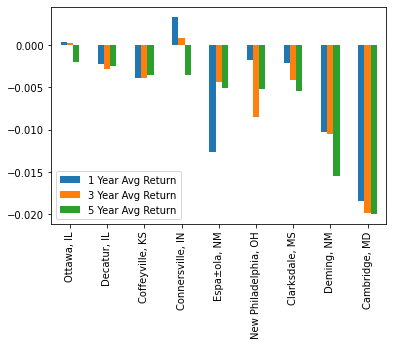

In [12]:
# Sample plot of data
plot_data = house_price_forecast.iloc[-10:-1,:]
plot_data.plot(kind='bar')

In [85]:
# Reformat table for joining with coordinates data
house_price_forecast.reset_index(inplace=True)
house_price_forecast[['city','state']] = house_price_forecast['index'].str.split(", ", n = 1, expand=True)
house_price_forecast.drop(columns=['index'],inplace=True)
house_price_forecast.set_index(['city','state'],inplace=True)
house_price_forecast

,,1 Year Avg Return,3 Year Avg Return,5 Year Avg Return
city,state,,,
Pecos,TX,0.108751,0.108905,0.110791
Grenada,MS,0.088230,0.093509,0.097108
Winnemucca,NV,0.078744,0.081973,0.086650
Williston,ND,0.062310,0.074976,0.079395
Klamath Falls,OR,0.070146,0.071528,0.073005
...,...,...,...,...
New Philadelphia,OH,-0.001726,-0.008532,-0.005224
Clarksdale,MS,-0.002079,-0.004151,-0.005442
Deming,NM,-0.010292,-0.010494,-0.015429


In [93]:
# Join coordinates data with forecasted prices for final dataframe
coordinates_df = longlatdensity_df.loc[:,['city','lat','lng','population','firstzip','state_id']] 
coordinates_df.drop_duplicates(subset=['city','state_id'],inplace=True)
coordinates_df.set_index(['city','state_id'],inplace=True)
combined_forecast_df = pd.concat([house_price_forecast,coordinates_df], axis='columns', join='inner')
combined_forecast_df.head(50)

,,1 Year Avg Return,3 Year Avg Return,5 Year Avg Return,lat,lng,population,firstzip
Riverside,CA,0.058063,0.052964,0.058018,33.9381,-117.3948,2107852.0,92508
Taos,NM,0.020457,0.020974,0.021892,36.3871,-105.5804,14196.0,87571
Valley,AL,0.014390,0.011645,0.014075,32.8088,-85.1809,19926.0,36854
Gainesville,FL,0.036492,0.031372,0.034691,29.6804,-82.3458,202335.0,32609
Plainview,TX,0.019846,0.018859,0.020544,34.1911,-101.7234,23424.0,79072
Jacksonville,FL,0.054760,0.046007,0.044499,30.3322,-81.6749,1181496.0,32224
Laramie,WY,0.026963,0.025351,0.026913,41.3099,-105.6085,33929.0,82072
Show Low,AZ,0.040621,0.047613,0.052504,34.2671,-110.0384,11173.0,85901
Portland,ME,0.042673,0.041080,0.043363,43.6773,-70.2715,203969.0,04101
Cleveland,TN,0.038557,0.033973,0.033482,35.1817,-84.8707,73596.0,37312
